# WELCOME!

## 1. Import Modules, Load Data and Data Review

In [8]:
#Gerekli kütüphaneler yukluyoruz
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew
import scipy.stats as stats
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [9]:
#Daha once temşzlediğimiz veri setini okuyoruz.
df = pd.read_csv("final_scout_not_dummy.csv")

In [11]:
#Data setimize genel bir bakış atıyoruz.
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [14]:
#Sutunlar hakkında bilgi alıyoruz.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [16]:
#Sayısal değişkenlerin istatistiksel özeti
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


In [18]:
df.columns

# Bu noktada column isimlerinin başında sonunda boşluk var mı bir sıkıntı var mı diye incelemekte fayda var.

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

## Feature Engineering

In [21]:
df.select_dtypes(include ="object").head()

# datasetimdeki object feature ları getirmesi için

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [23]:
# Bu kod, 'object' veri tipindeki sütunlardaki benzersiz değer sayısını ekrana yazdırır.
for col in df.select_dtypes('object').columns:
    print(f"{col:<20}:", df[col].nunique())
     

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [25]:
df.Gearing_Type.value_counts()

Gearing_Type
Manual            8149
Automatic         7297
Semi-automatic     469
Name: count, dtype: int64

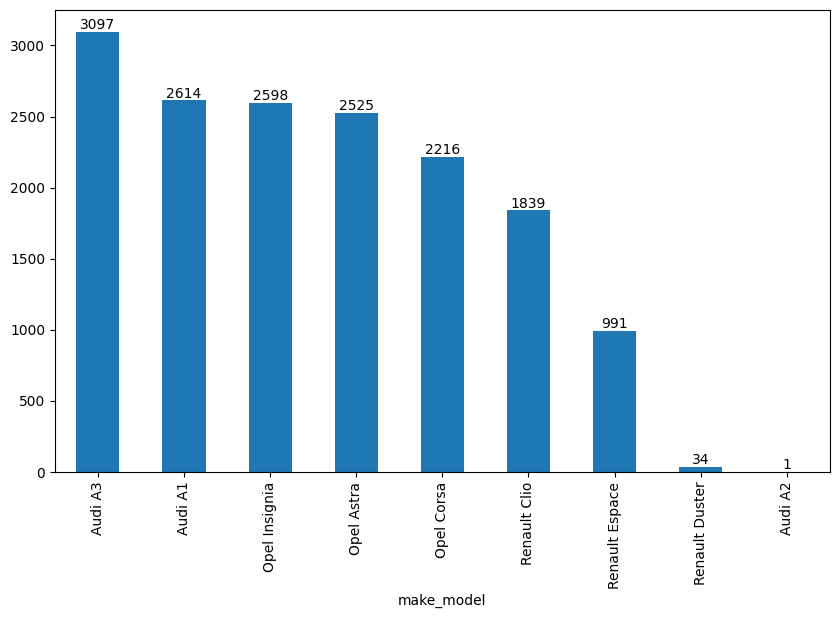

In [27]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.bar_label(ax.containers[0]);

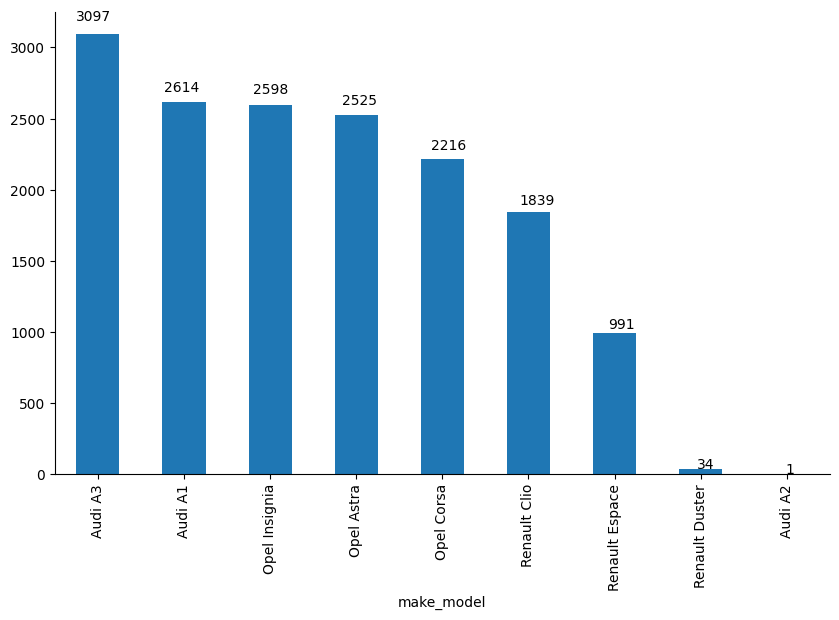

In [29]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))  # *1.03 ile rakamların yerini aşağı yukarı sağa sola  ayarlıyoruz
    
# Audi A2 den 1 tane data var onunla train olmayacağı aşikar. Bana eğitim namına birşey katmayacağı için onu düşürmek istiyorum. 

In [31]:
df[df.make_model=="Audi A2"]

# drop edeceğim Audi A2'nin satır numarasını öğrendim.

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.0,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9


In [33]:
df.drop(index = [2614], inplace = True)

# Audi A2'yi drop ettim. artık satır sayım 15914

In [35]:
df.shape

(15914, 23)

<Axes: xlabel='price', ylabel='Count'>

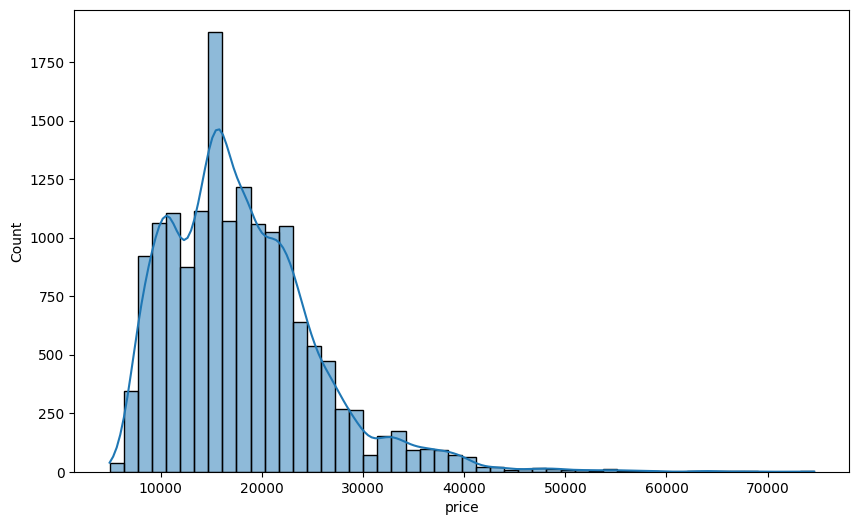

In [37]:
sns.histplot(df.price, bins = 50, kde=True)

**Hisplotta right skewed olduğunu gördük. Ancak bizim modelimizde duster olduğu gibi Audi A3 de var. o yüzden bu tür incelemeleri yaparken modelimizdeki gruplara ayırıp gruplar üzerinden bunları analiz etmemiz daha doğru olur. yoksa birbirinden farklı konseptte modeller var bunun dağılımı bizi yanıltır.**

In [41]:
skew(df.price)

1.236330745564795

In [44]:

def check_dist(df, var):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=df[var], kde=True)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.show()

Audi A1


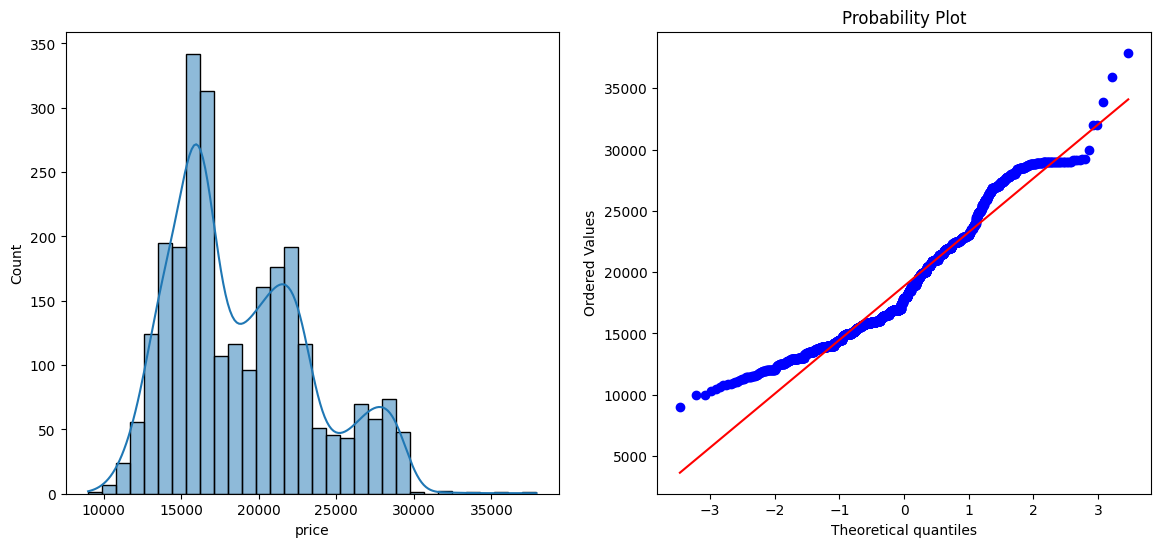

Audi A3


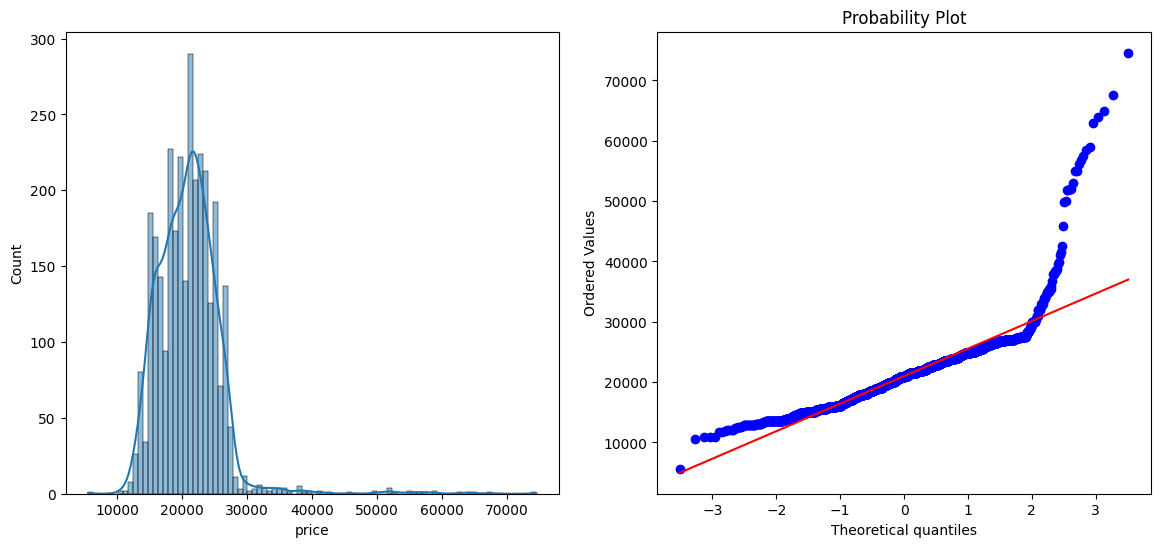

Opel Astra


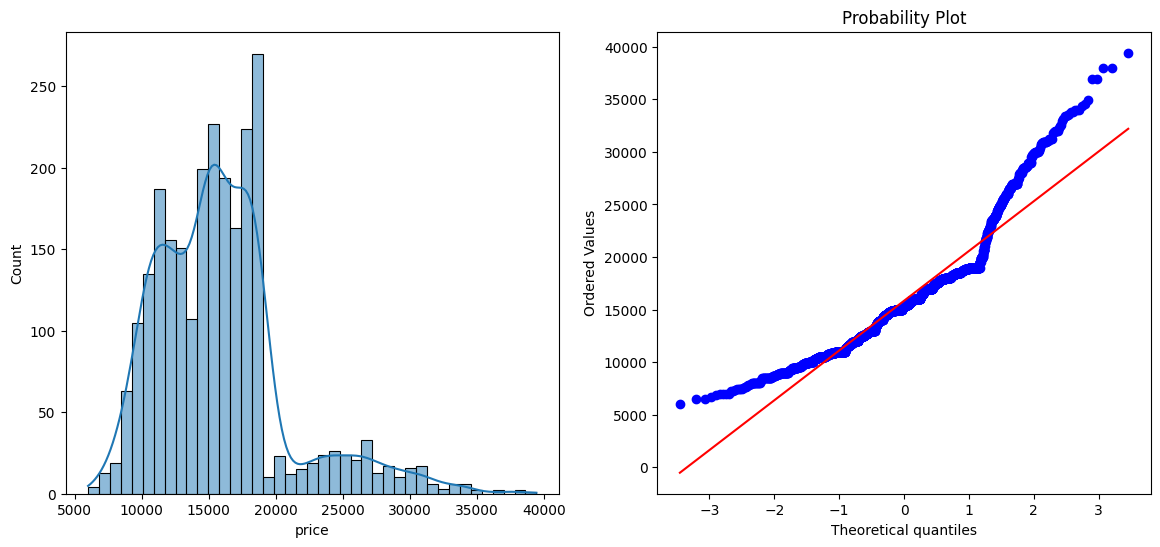

Opel Corsa


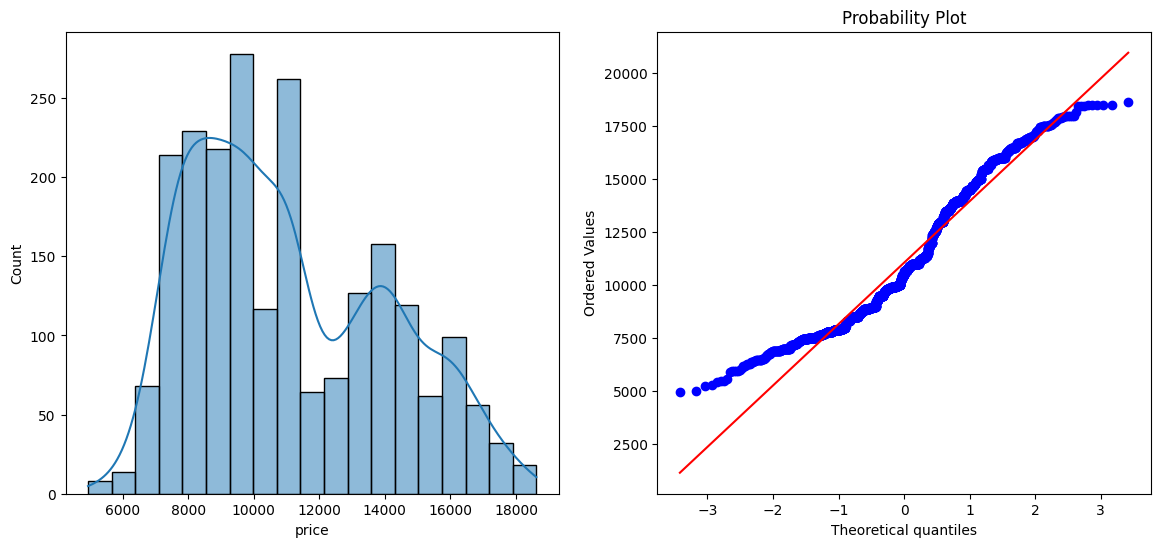

Opel Insignia


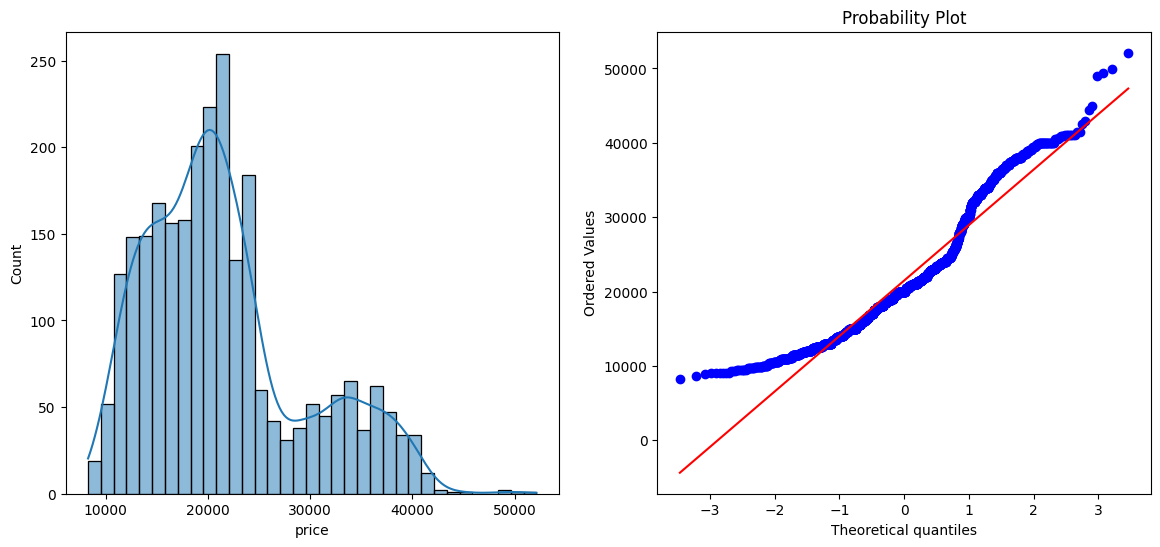

Renault Clio


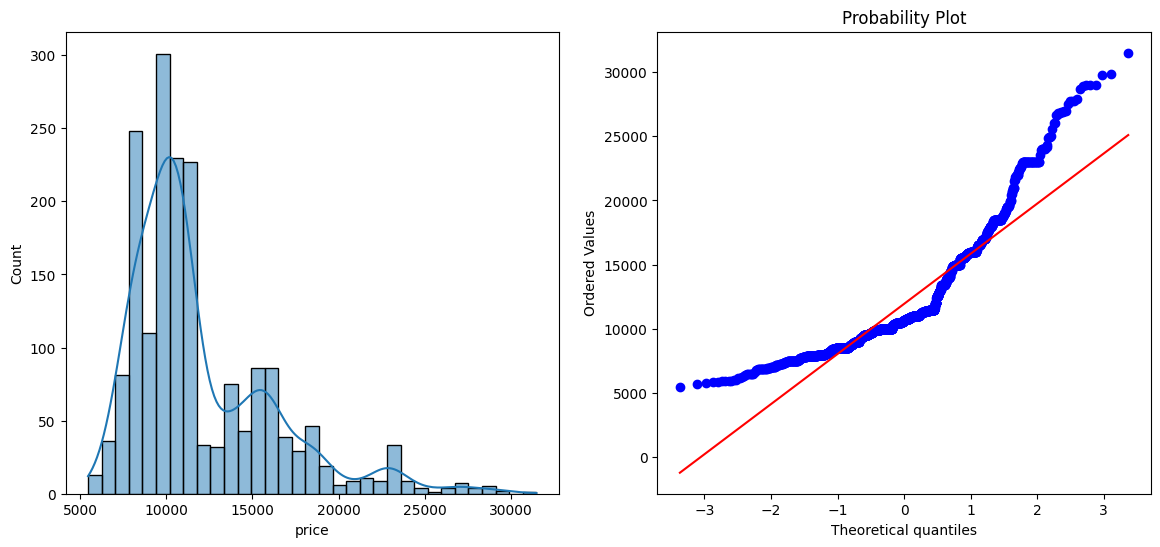

Renault Duster


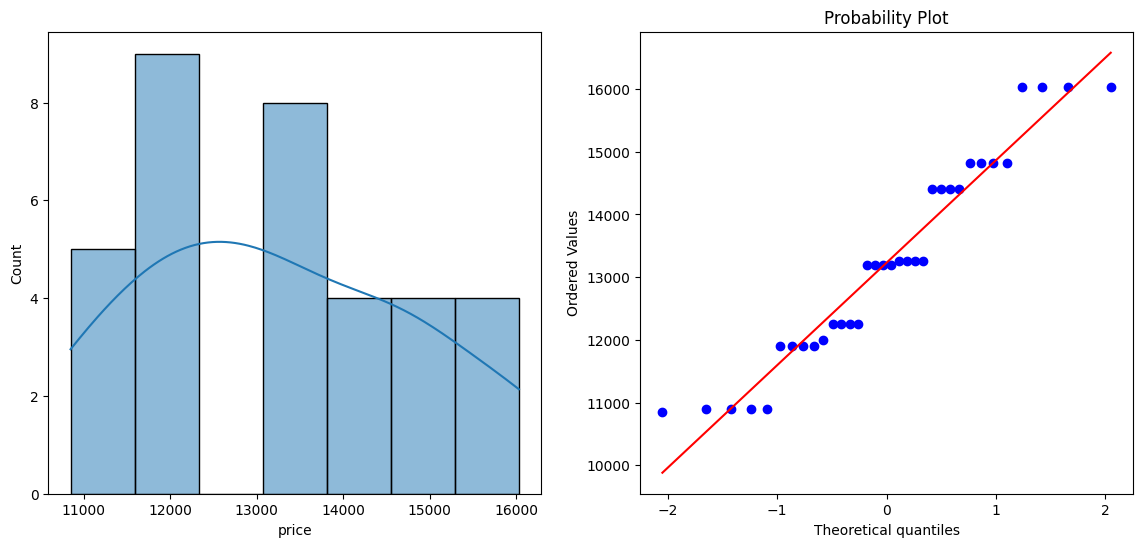

Renault Espace


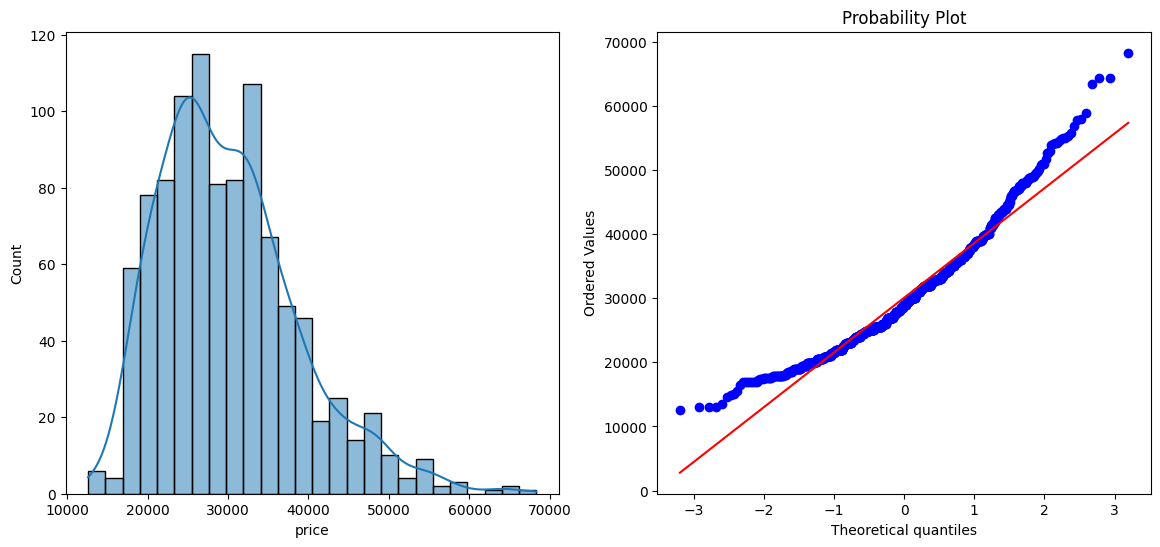

In [46]:
for col in df.make_model.unique():
    print(col)
    check_dist(df[df["make_model"] ==col], "price")

In [47]:
for i in df.make_model.unique():
    print(f"{i:<20}:", skew(df[df["make_model"] ==i]["price"]))

Audi A1             : 0.633943618548136
Audi A3             : 2.7921715813837165
Opel Astra          : 1.2192882272285543
Opel Corsa          : 0.4915263161093481
Opel Insignia       : 0.8286640275314286
Renault Clio        : 1.503121452229625
Renault Duster      : 0.2268067802692965
Renault Espace      : 0.8959719457249508


In [50]:
for i in df.make_model.unique():
    print(i, "\t\t:", skew(df[df["make_model"] ==i]["price"]))

Audi A1 		: 0.633943618548136
Audi A3 		: 2.7921715813837165
Opel Astra 		: 1.2192882272285543
Opel Corsa 		: 0.4915263161093481
Opel Insignia 		: 0.8286640275314286
Renault Clio 		: 1.503121452229625
Renault Duster 		: 0.2268067802692965
Renault Espace 		: 0.8959719457249508


In [52]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1
...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4
15912,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3
15913,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3


<Axes: >

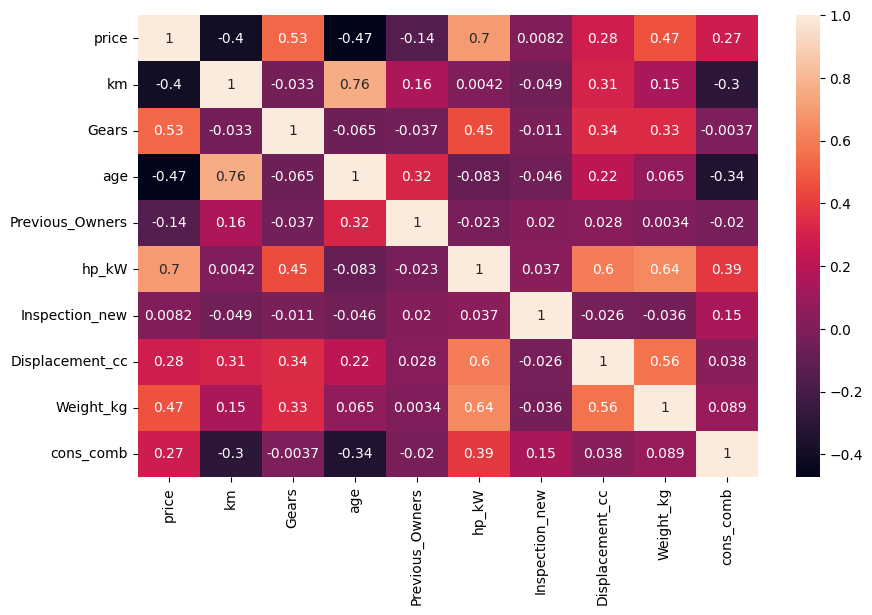

In [54]:
# heatmap ile correlasyonlarına bakalım.

sns.heatmap(df_numeric.corr(), annot=True)

## multicollinearity control

In [57]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [59]:
df_numeric.corr()[(df_numeric.corr() <= -0.9) & (df_numeric.corr() > -1)].any().any()

False

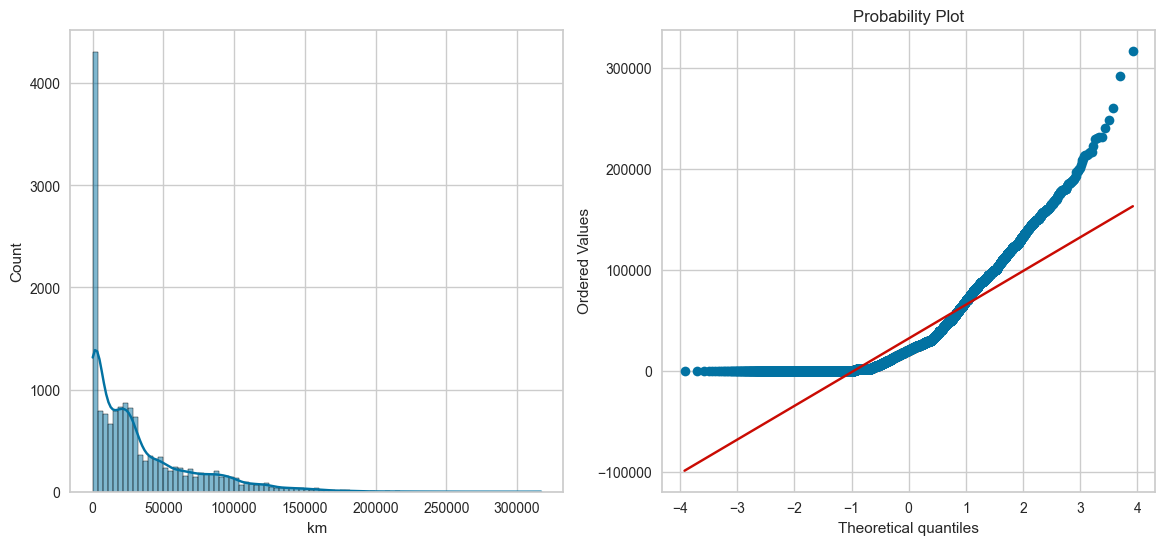

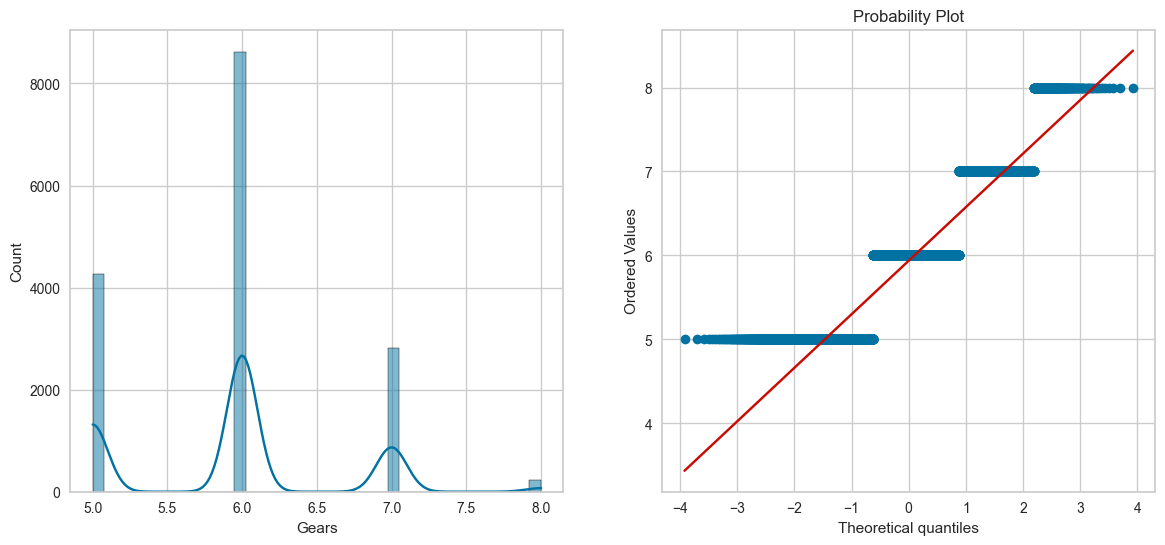

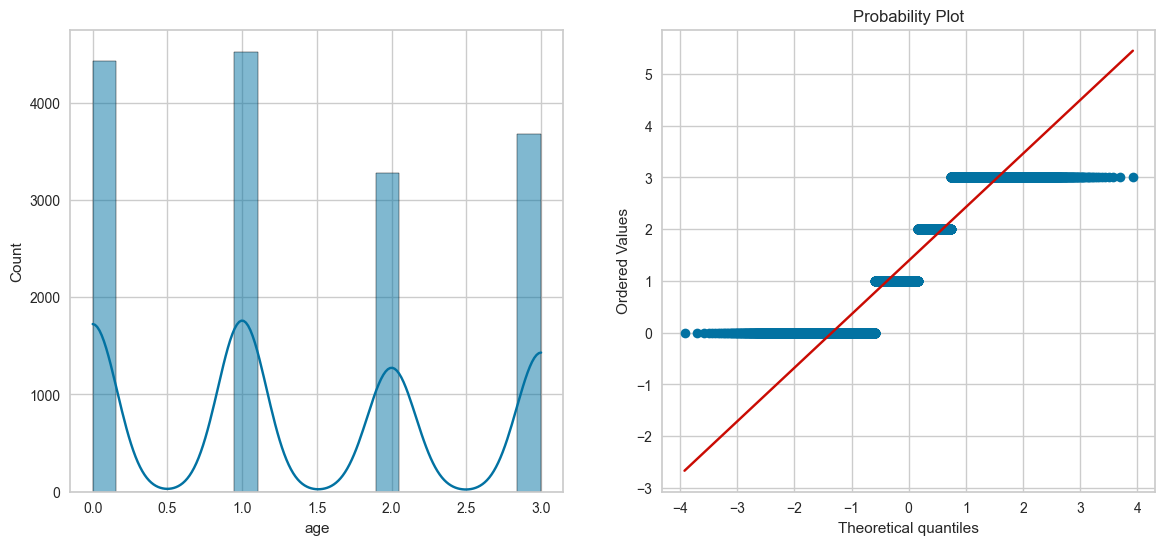

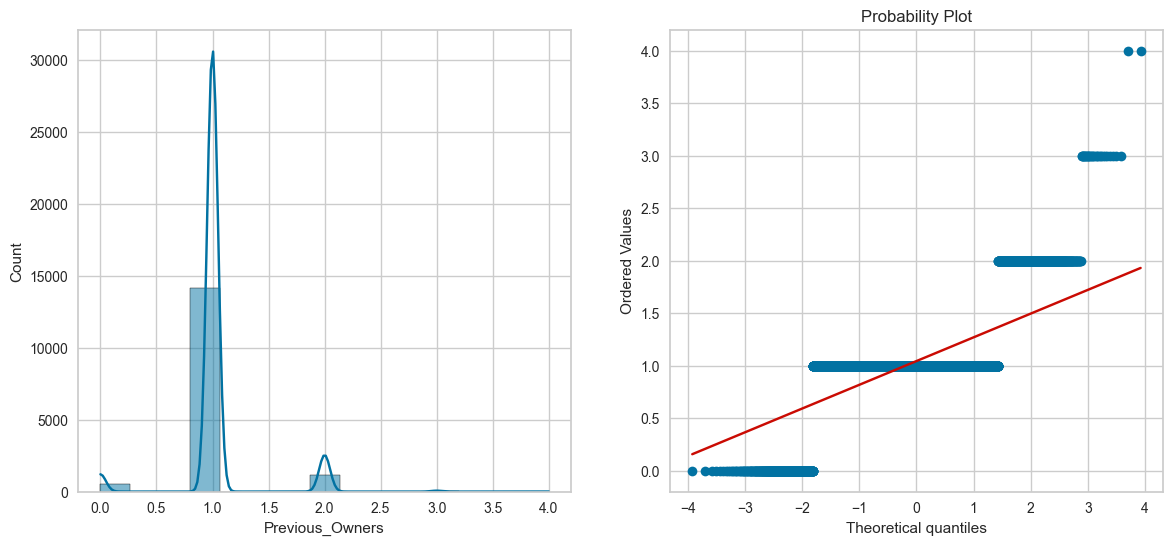

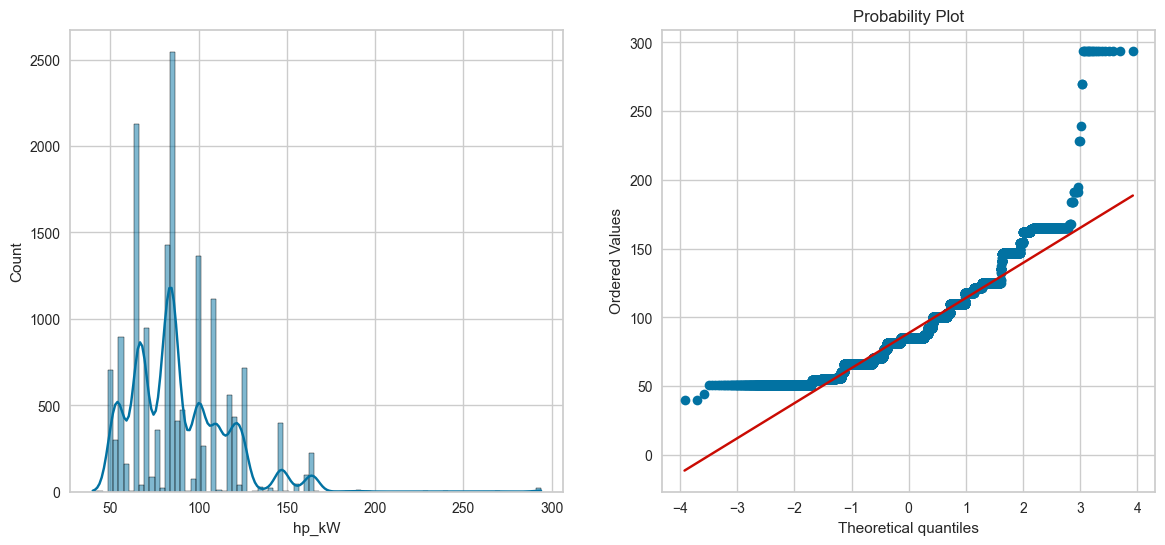

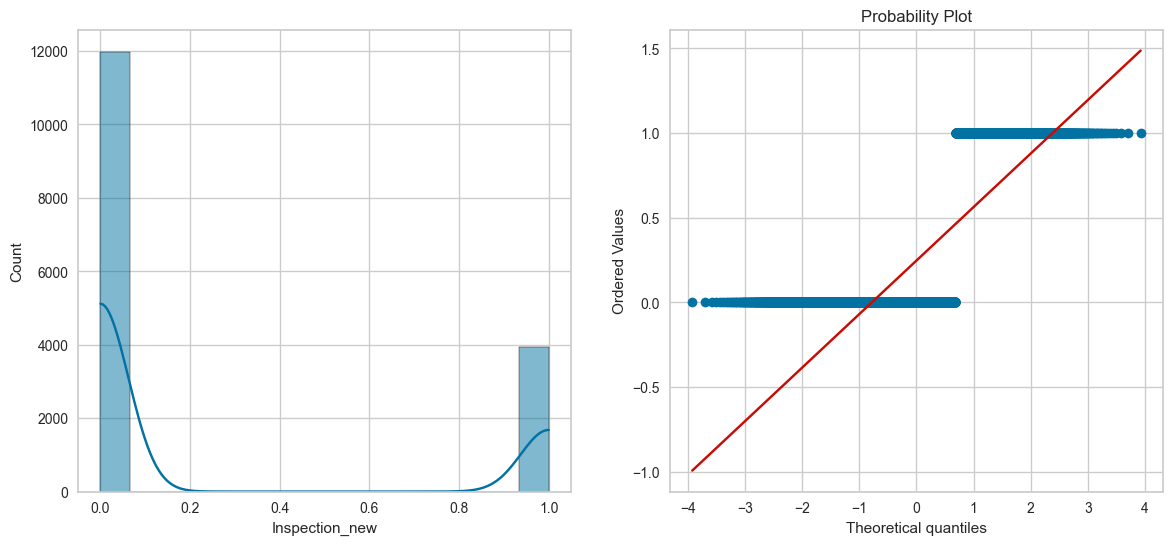

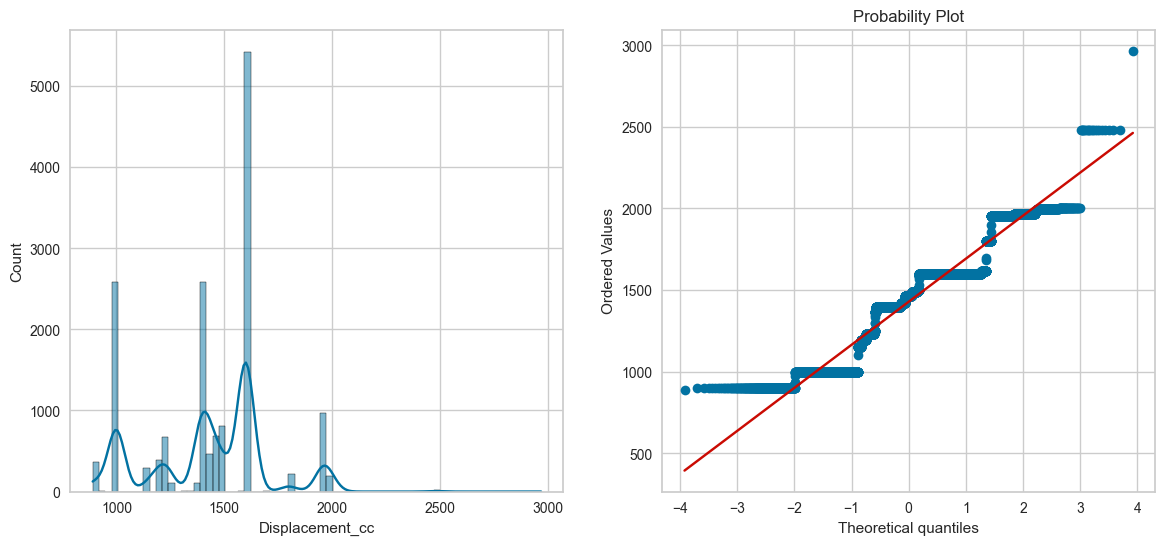

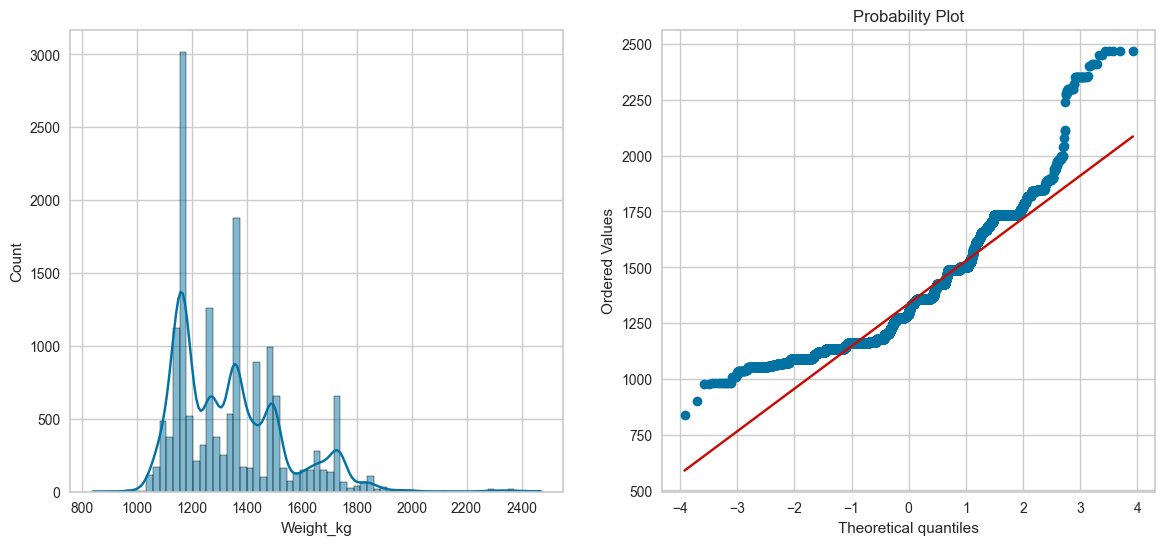

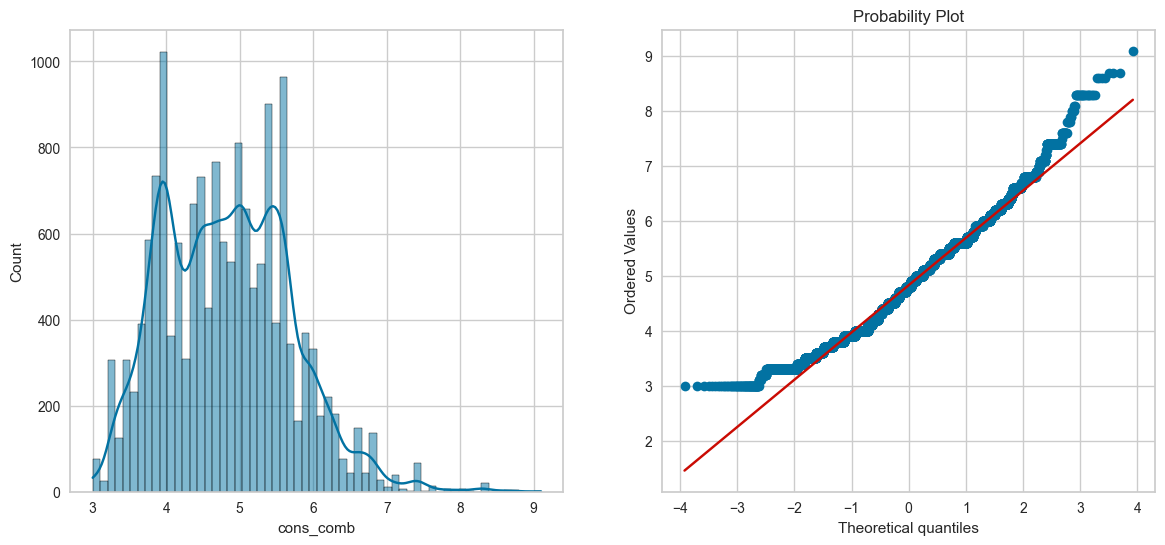

In [251]:
for col in df_numeric.iloc[:,1:]:  # 0.indekste price var onu almıyoruz
    check_dist(df_numeric, col)

In [252]:
for i in df_numeric:
    print(f"{i:<16}:  {skew(df[i]):.3f}")

price           :  1.236
km              :  1.623
Gears           :  0.331
age             :  0.176
Previous_Owners :  1.075
hp_kW           :  1.292
Inspection_new  :  1.173
Displacement_cc :  -0.097
Weight_kg       :  1.082
cons_comb       :  0.419


<Axes: ylabel='price'>

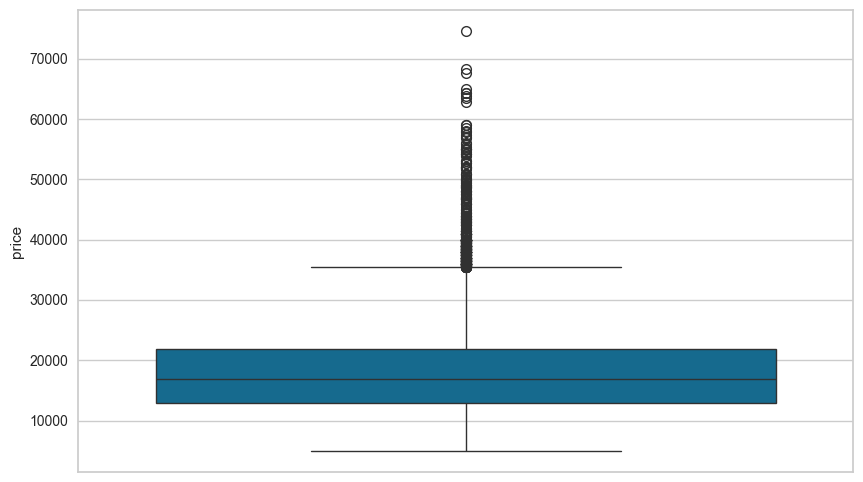

In [253]:
sns.boxplot(df.price)

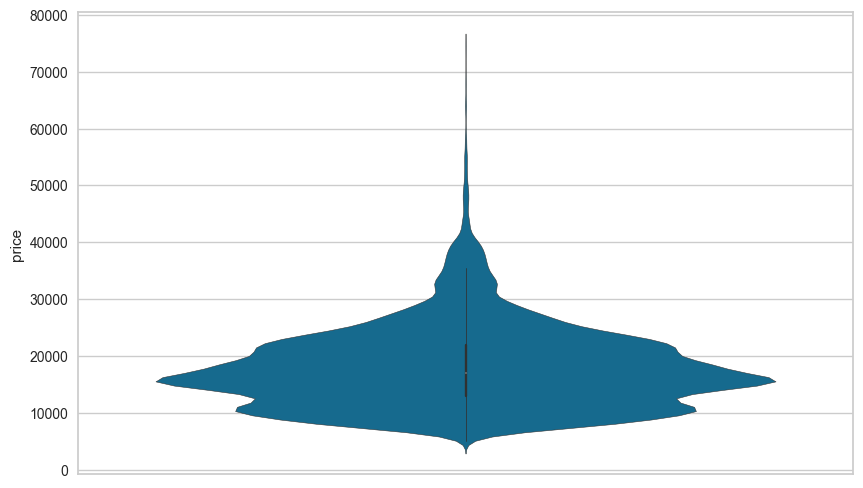

In [254]:
sns.violinplot(df.price);

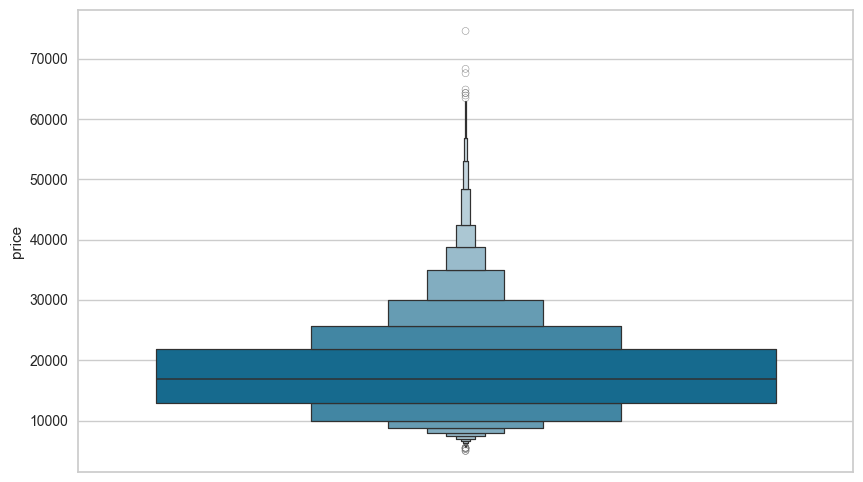

In [255]:
sns.boxenplot(df.price);

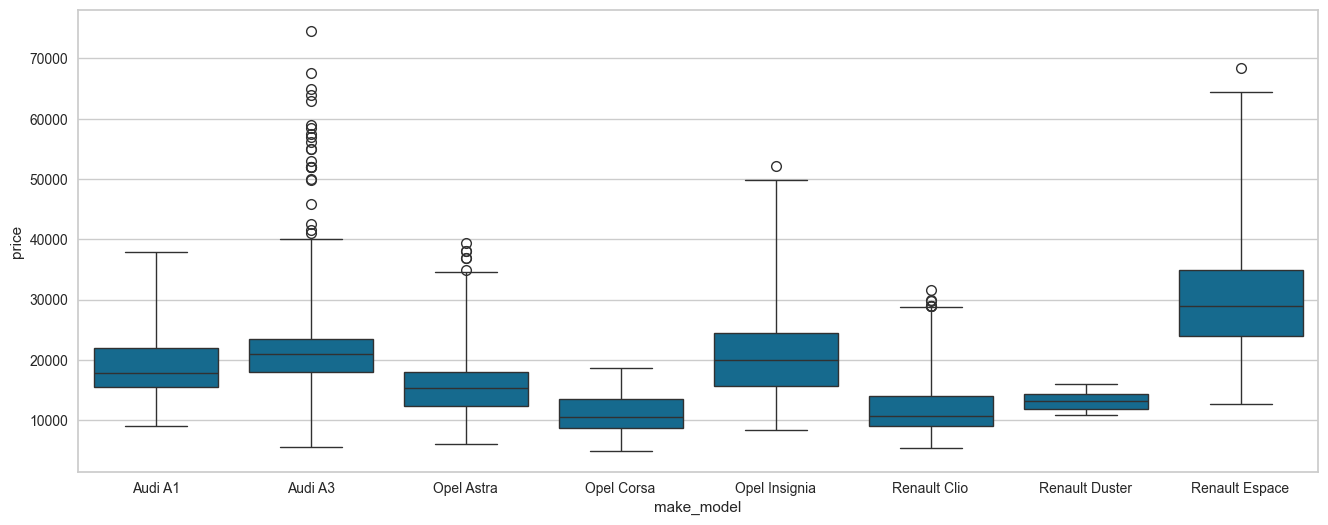

In [256]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

## Get dummies 

In [258]:
# içinde virgülle ayrılmış categorical verileri bu şekilde dummy'e çeviriyoruz. 

df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [259]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [260]:
# yukardaki kategorik featurelar dışında kalan diğer feature lar kendi içinde virgülle ayrılmış değil. her satırda bir veri var. 
# o yüzden bu şekilde dummy'e çeviriyoruz.

df = pd.get_dummies(df, drop_first =True)

In [261]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0

In [262]:
df.shape

(15914, 133)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15914 entries, 0 to 15914
Columns: 133 entries, price to Drive_chain_rear
dtypes: bool(29), float64(8), int64(96)
memory usage: 13.7 MB


In [264]:
df.isnull().any().any()

False

In [265]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.473
Gearing_Type_Manual                        -0.432
km                                         -0.399
make_model_Opel Corsa                      -0.379
Type_Used                                  -0.366
make_model_Renault Clio                    -0.298
Drive_chain_front                          -0.156
Previous_Owners                            -0.145
make_model_Opel Astra                      -0.128
em_CD player                               -0.093
em_On-board computer                       -0.077
ss_Central door lock with remote control   -0.070
ss_Fog lights                              -0.053
Paint_Type_Perl effect                     -0.050
ss_Isofix                                  -0.046
body_type_Sedans                           -0.044
ss_Central door lock                       -0.044
ss_Power steering                          -0.041
Paint_Type_Uni/basic                       -0.035
ss_Head airbag                             -0.034


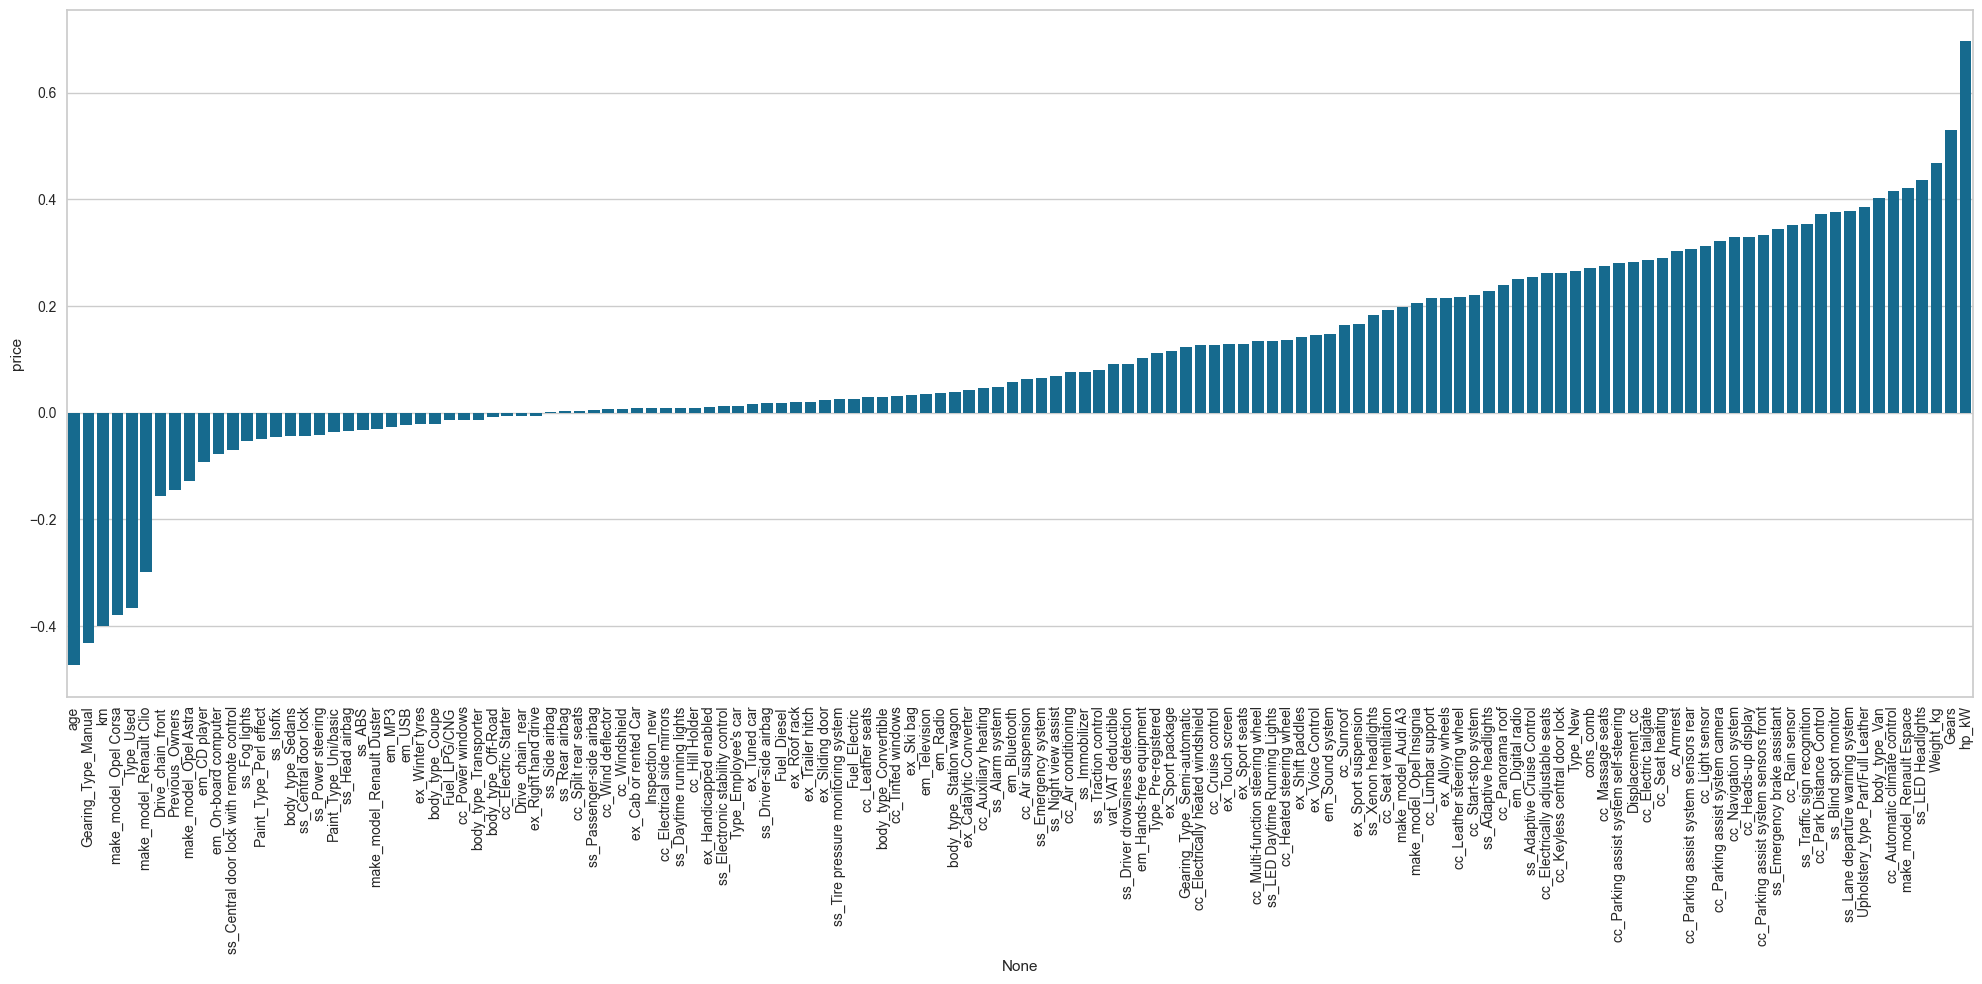

In [266]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

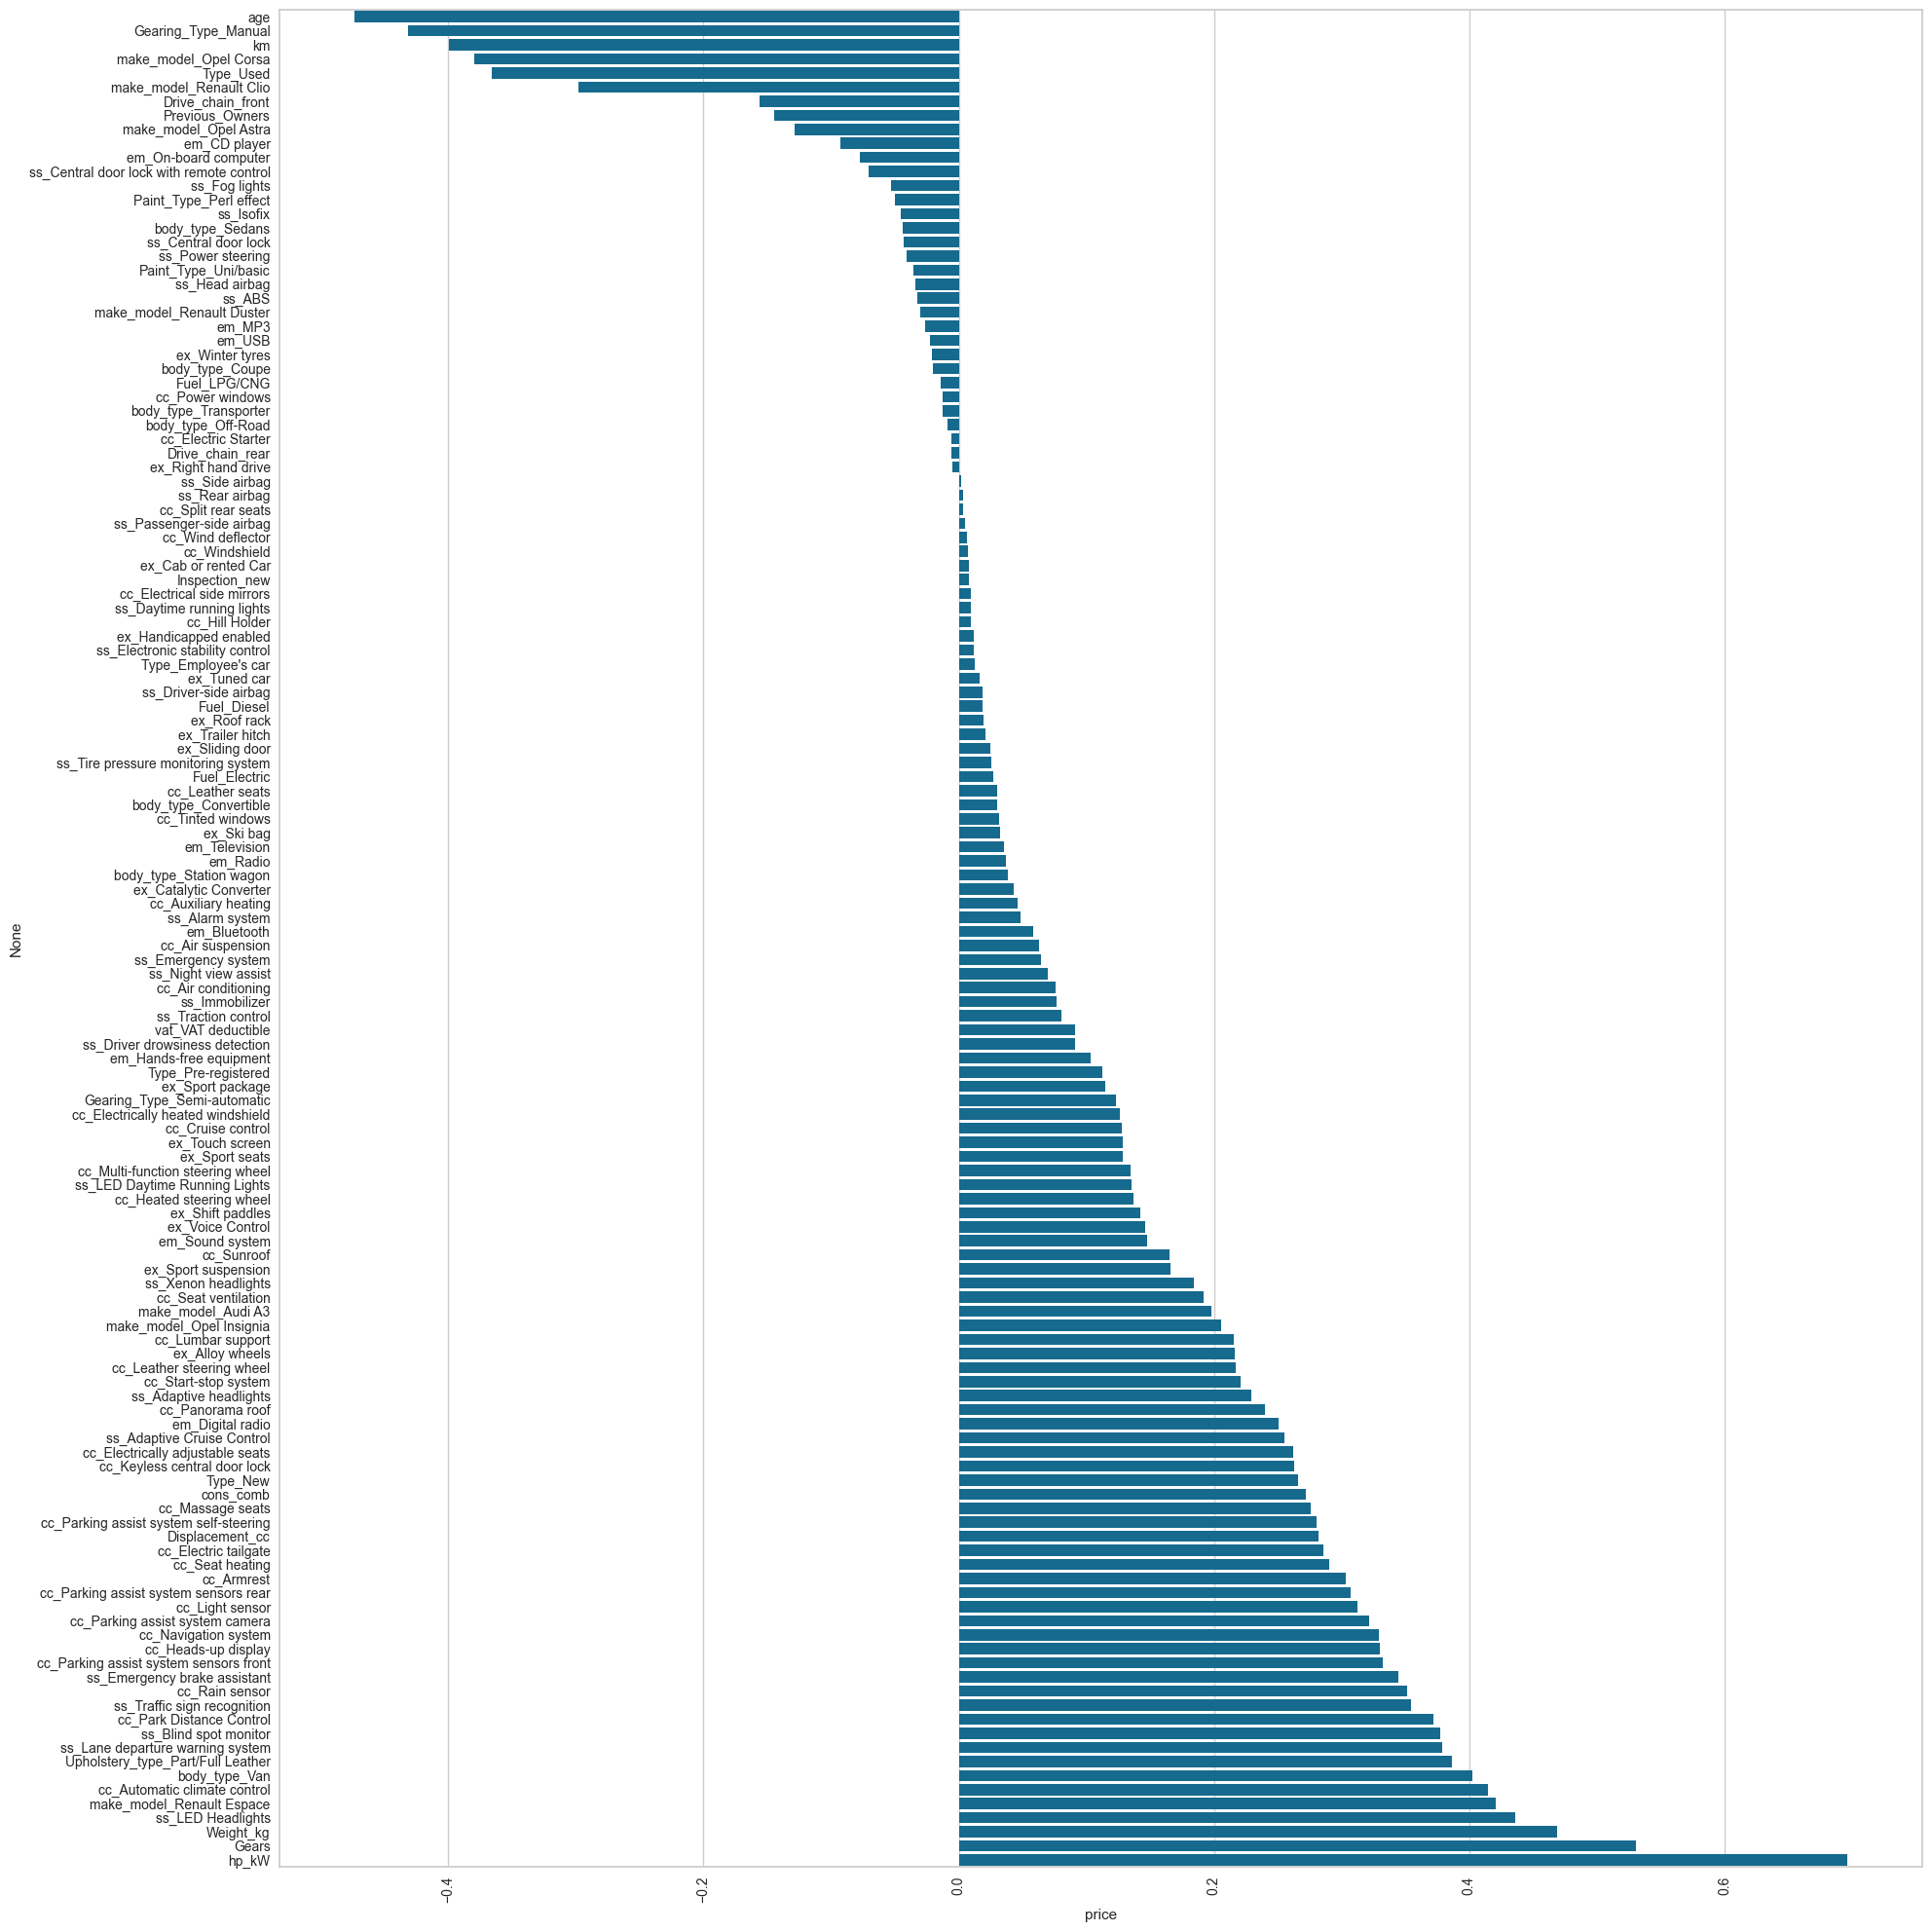

In [267]:
plt.figure(figsize=(20, 20))  
sns.barplot(x=corr_by_price, y=corr_by_price.index)  
plt.xticks(rotation=90)  
plt.tight_layout()

### Train | Test Split

In [272]:
X = df.drop("price", axis =1)
y = df["price"]

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [274]:
X_train.shape

(12731, 132)

In [275]:
X_test.shape

(3183, 132)

## 3. Implement RandomForest

In [277]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [278]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [301]:
from sklearn.ensemble import RandomForestRegressor  
model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,   
                               min_samples_leaf=1, max_features='log2',   
                               bootstrap=True, oob_score=True, random_state=42)  
model.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', oob_score=True, random_state=42)

In [303]:
y_pred = model.predict(X_test)

In [305]:
y_train_pred = model.predict(X_train)

In [307]:
pd.options.display.float_format = '{:.3f}'.format

In [309]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.990,0.936
mae,416.456,1094.198
mse,529849.469,3395001.534
rmse,727.908,1842.553


## Cross Validate

In [312]:
model = RandomForestRegressor(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [313]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,8.990,0.025,0.954,-859.178,-2209101.645,-1486.305
1,8.716,0.025,0.958,-877.232,-2269311.089,-1506.423
2,8.703,0.024,0.939,-971.719,-3383960.936,-1839.555
3,8.670,0.024,0.958,-878.350,-2499484.169,-1580.976
4,8.613,0.026,0.941,-956.569,-3429743.145,-1851.957
5,8.574,0.024,0.958,-895.828,-2360682.154,-1536.451
6,8.550,0.024,0.959,-890.677,-2128718.962,-1459.013
7,8.633,0.025,0.963,-863.604,-2070335.868,-1438.866
8,8.583,0.024,0.939,-976.409,-3491006.418,-1868.424
9,8.538,0.024,0.954,-896.283,-2395106.392,-1547.613


In [314]:
pd.DataFrame(scores).iloc[:, 2:].mean()  # skorlarım 2. indeksten itibaren başladığı için


test_r2                                   0.952
test_neg_mean_absolute_error           -906.585
test_neg_mean_squared_error        -2623745.078
test_neg_root_mean_squared_error      -1611.558
dtype: float64



- `test_r2`: 0.886 – Bu, modelin açıklayıcılık oranını gösterir ve 1'e yakın değerler iyi bir uyumu ifade eder.
- `test_neg_mean_absolute_error`: -1729.891 – Negatif ortalama mutlak hatadır ve daha az negatif bir değer gözlemlenirse modelin daha iyi performans gösterdiği anlamına gelir.
- `test_neg_mean_squared_error`: -6248524.708 – Negatif ortalama kare hatadır; daha az negatif değerler, modelin doğruluğunun arttığını gösterir.
- `test_neg_root_mean_squared_error`: -2497.396 – Negatif kök ortalama kare hatasıdır; daha düşük değerler, daha iyi model performansını ifad bulunur.

In [324]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9357365000611477
MAE 		: 1094.1982895226613
MSE 		: 3395001.5337272915
RMSE 		: 1842.5529934651247


In [326]:
RF_R2 = r2_score(y_test, y_pred)
RF_mae = mean_absolute_error(y_test, y_pred)
RF_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Prediction Error

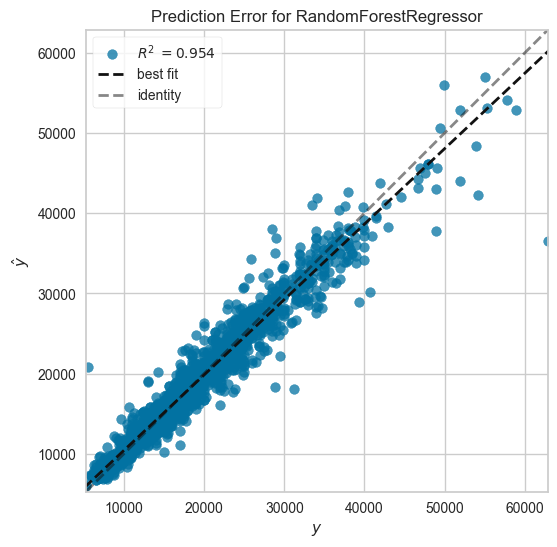

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [329]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test) 
visualizer.show() 

# 10.000 ile 20.000 fiyat aralığında tahminleri iyi yapabildiği ama 30.000 den sonra ciddi anlamda tahminler yanılıyor.
# çünkü o fiyattan sonra yüksek motor hacimli arabalar yer alıyor ve data sayısı da az.

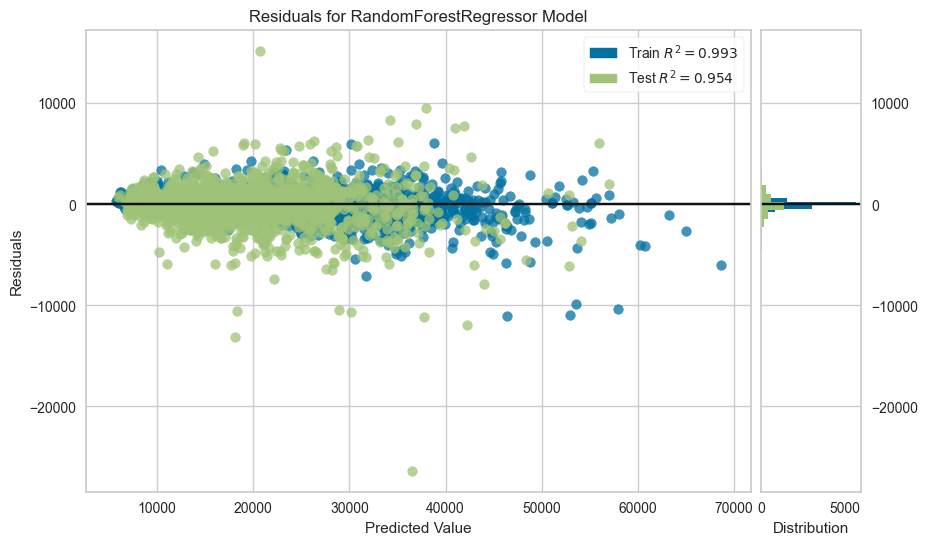

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [330]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()       

In [331]:
df.price.mean()

18023.741171295715

In [332]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [334]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
12908,32490,32362.838,127.162
6181,9650,12515.010,-2865.010
14690,11450,11685.916,-235.916
8082,18900,17622.740,1277.260
14895,13250,15861.425,-2611.425
9585,9500,9395.140,104.860
6752,12950,12414.270,535.730
10271,10689,10689.000,0.000
7678,27450,26104.070,1345.930
2657,18000,17634.380,365.620


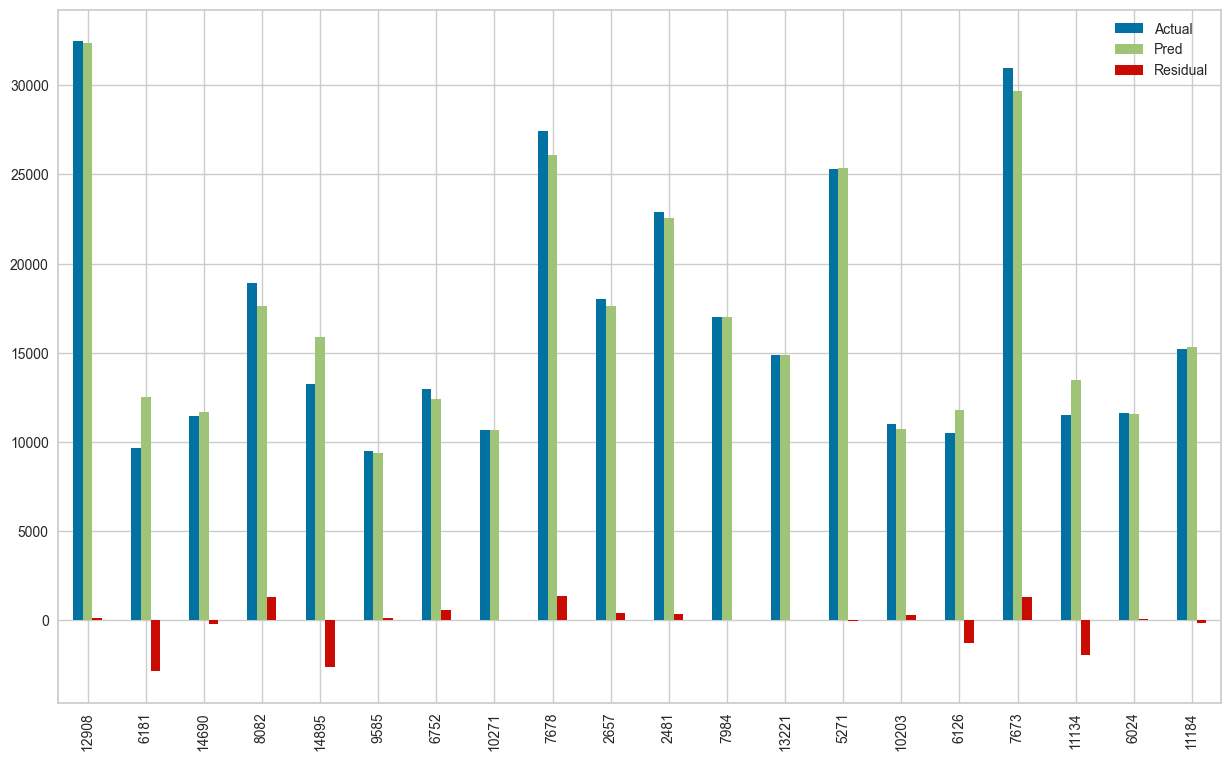

In [339]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

## Feature İmportance

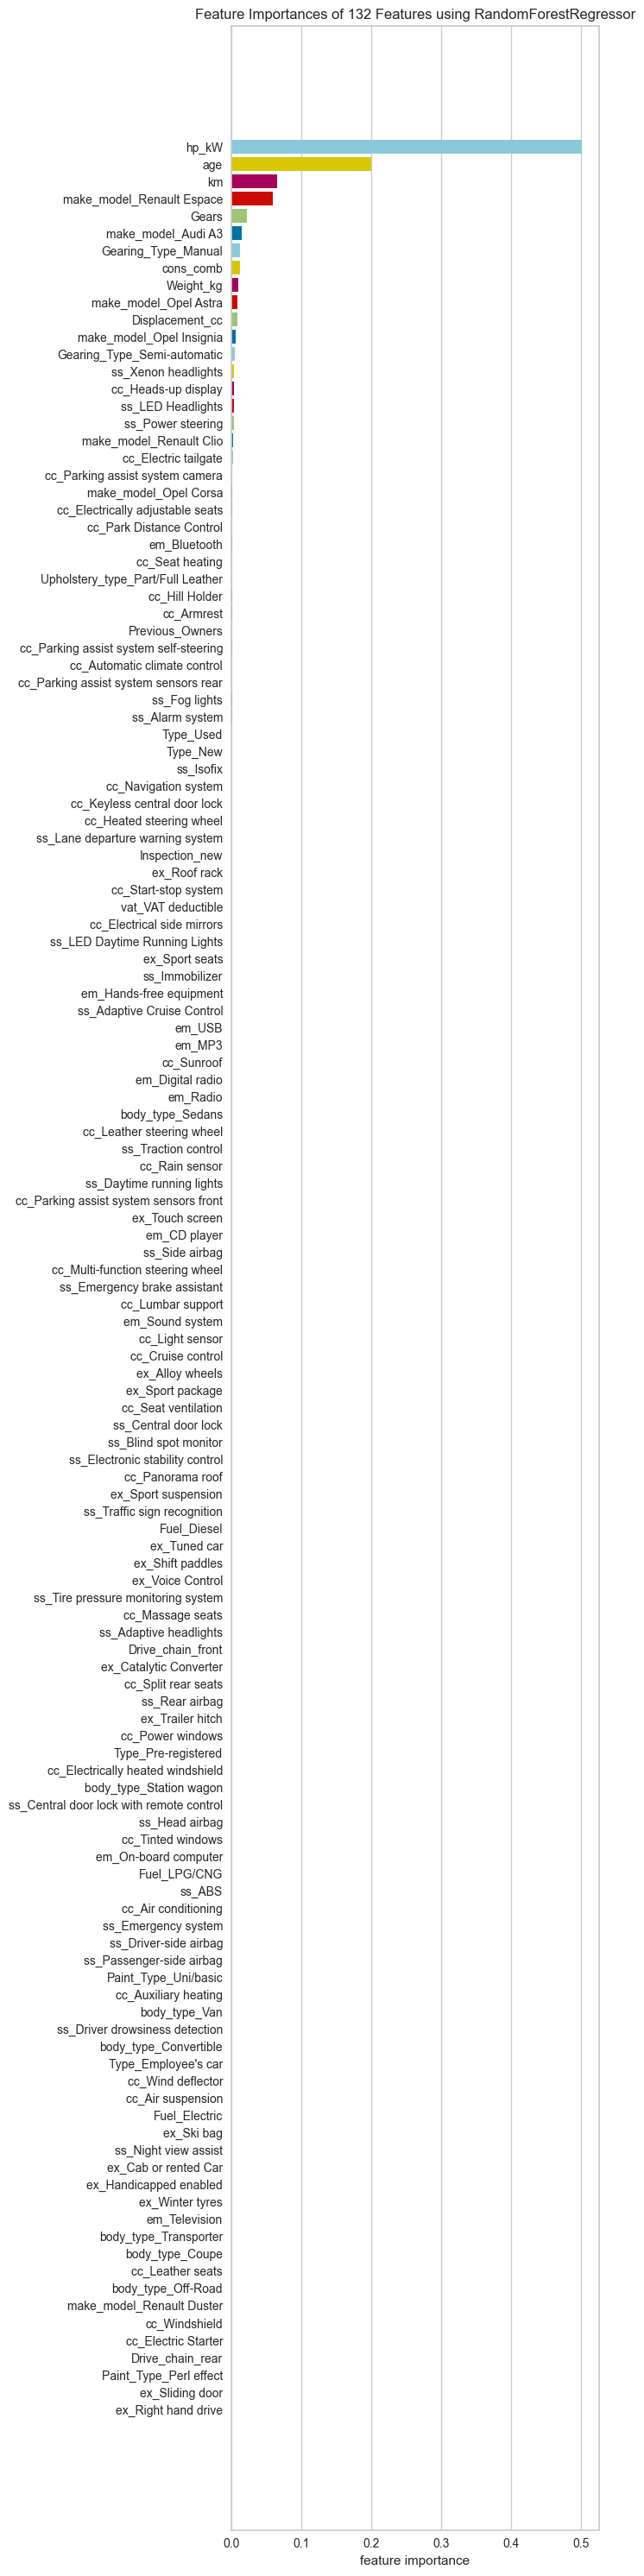

<Axes: title={'center': 'Feature Importances of 132 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [342]:
from yellowbrick.model_selection import FeatureImportances  
from yellowbrick.features import RadViz  
from sklearn.ensemble import RandomForestRegressor  

viz = FeatureImportances(RandomForestRegressor(random_state=42), labels=df.drop(columns="price").columns, relative=False)  
visualizer = RadViz(size=(720, 3000))  

 
viz.fit(X_train, y_train)  
viz.show()

In [343]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [344]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [345]:
df_new = df[["make_model", "hp_kW", "km", "age", "price", "Gearing_Type"]]
# df_new = df[["make_model", "hp_kW", "km", "age", "price", "Gears", "Gearing_Type", "cons_comb"]]

# FeatureImportances ile belirlediğim etkili feature'ların dummies uygulanmamış hali neyse 
# isimlerini o şekilde seçiyorum ve (ilk haliyle) sadece bu feature lar ile yeniden modelimi eğitiyorum.

In [346]:
df_new

,make_model,hp_kW,km,age,price,Gearing_Type
0,Audi A1,66.000,56013.000,3.000,15770,Automatic
1,Audi A1,141.000,80000.000,2.000,14500,Automatic
2,Audi A1,85.000,83450.000,3.000,14640,Automatic
3,Audi A1,66.000,73000.000,3.000,14500,Automatic
4,Audi A1,66.000,16200.000,3.000,16790,Automatic
...,...,...,...,...,...,...
15910,Renault Espace,147.000,1647.363,0.000,39950,Automatic
15911,Renault Espace,165.000,9900.000,0.000,39885,Automatic
15912,Renault Espace,146.000,15.000,0.000,39875,Automatic
15913,Renault Espace,147.000,10.000,0.000,39700,Automatic


In [347]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make_model    15915 non-null  object 
 1   hp_kW         15915 non-null  float64
 2   km            15915 non-null  float64
 3   age           15915 non-null  float64
 4   price         15915 non-null  int64  
 5   Gearing_Type  15915 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 746.1+ KB


In [348]:
df_new[df_new["make_model"] == "Audi A2"]

# en başta yaptığım gibi Audi A2'yi (outlier olduğu için) düşürmek üzere indeksini tespit ettim.

,make_model,hp_kW,km,age,price,Gearing_Type
2614,Audi A2,85.000,26166.000,1.000,28200,Manual


In [349]:
df_new.drop(index=[2614], inplace =True)

# A2'yi düşürdüm.

In [350]:
df_new = pd.get_dummies(df_new)

In [351]:
df_new

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,True,False,False,False,False,False,False,False,True,False,False
1,141.000,80000.000,2.000,14500,True,False,False,False,False,False,False,False,True,False,False
2,85.000,83450.000,3.000,14640,True,False,False,False,False,False,False,False,True,False,False
3,66.000,73000.000,3.000,14500,True,False,False,False,False,False,False,False,True,False,False
4,66.000,16200.000,3.000,16790,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,147.000,1647.363,0.000,39950,False,False,False,False,False,False,False,True,True,False,False
15911,165.000,9900.000,0.000,39885,False,False,False,False,False,False,False,True,True,False,False
15912,146.000,15.000,0.000,39875,False,False,False,False,False,False,False,True,True,False,False
15913,147.000,10.000,0.000,39700,False,False,False,False,False,False,False,True,True,False,False


In [352]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [366]:
final_model = RandomForestRegressor(random_state=42) 

In [368]:
final_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [369]:
y_train_pred = final_model.predict(X_train)
y_pred = final_model.predict(X_test)

In [370]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.973,0.924
mae,611.529,1174.215
mse,1464018.389,4147528.128
rmse,1209.966,2036.548


In [374]:
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [377]:
scores = {"RF_all_features": {"r2_score": RF_R2 , 
 "mae": RF_mae, 
 "rmse": RF_rmse},        
 "RF_selected_features": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
RF_all_features,0.936,1094.198,1842.553
RF_selected_features,0.924,1174.215,2036.548


8 Features
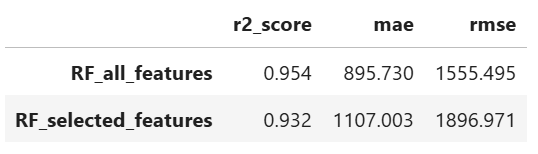

In [ ]:
metrics = scores.columns
for i,j in enumerate(metrics):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

## Prediction new observation

In [ ]:
columns_name = X.columns

In [ ]:
final_model = RandomForestRegressor(random_state=42) 

In [ ]:
final_model.fit(X,y) # bütün datamla eğitiyorum

In [ ]:
df[df.make_model=="Audi A3"].sample(1)

In [ ]:
my_dict = {
    "hp_kW": 92,
    "age": 3,
    "km": 110000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Manual",
    "Gear": 6,
    "cons_comb": 5.2
}

# indeks 2995'e yakın yeni değerler verdik.(92, 3, 10832, Audi a3, Manual, 6, 5.1)

In [ ]:
my_dict = pd.DataFrame([my_dict])
my_dict

In [ ]:
my_dict = pd.get_dummies(my_dict)
my_dict

In [ ]:
my_dict = my_dict.reindex(columns=columns_name, fill_value=0)
my_dict

 # sıralama aşağıdaki şekilde olacak şekilde my_dict'imi düzenliyorum

In [ ]:
df_new.head()



In [ ]:
my_dict

In [ ]:
final_model.predict(my_dict)

In [ ]:
df.iloc[2995]

In [381]:
import joblib  

# Modeli kaydetme  
joblib.dump(final_model, 'final_model2.pkl')  

# Modeli yükleme  
loaded_model = joblib.load('final_model2.pkl')

In [383]:
loaded_model.predict(X_test)

array([34078.        , 17117.69124941, 12468.2       , ...,
       22732.24057452, 21668.6       , 25277.59175325])

In [388]:
y_test

12887    26379
8141     18990
6836     12480
12468    34490
1213     15888
         ...  
2880     16480
12165    21450
7783     24195
1665     21900
5666     25410
Name: price, Length: 3183, dtype: int64

In [ ]:
#############################################################################################3333

In [ ]:
# Car Price Prediction py file

#!/usr/bin/env python  
# coding: utf-8  

from flask import Flask, render_template, request  
import numpy as np  
import joblib  
import pandas as pd  

app = Flask(__name__)  

# Load the model and scaler  
model_path = 'C:/Users/User/Desktop/furkan/AutoScout/final_model.pkl'  
model = joblib.load(model_path)  

# Function to make predictions  
def make_prediction(sample_obs):  
    # Convert sample_obs to a DataFrame and apply one-hot encoding  
    sample_df = pd.DataFrame([sample_obs], columns=["make_model", "hp_kW", "km", "age", "Gearing_Type"])  
    sample_df = pd.get_dummies(sample_df)  
    
    # Align the DataFrame with the model's training features  
    sample_df = sample_df.reindex(columns=model.feature_names_in_, fill_value=0)  
    
    # Make the prediction  
    prediction = model.predict(sample_df)  
    return prediction  

@app.route("/", methods=["GET", "POST"])  
def home():  
    prediction = None  
    result_message = ""  
    if request.method == "POST":  
        try:  
            features = [  
                str(request.form["make_model"]),  
                float(request.form["hp_kW"]),  
                float(request.form["km"]),  
                float(request.form["age"]),  
                str(request.form["Gearing_Type"]),  
            ]  
           
            # Make a prediction  
            prediction = make_prediction(features)  
            result_message = f"Estimated price of your car with the given values is: {int(prediction[0])}"  
        except Exception as e:  
            result_message = f"Error: {e}"  # Display the error message  

    return render_template("form.html", prediction=result_message)  

if __name__ == "__main__":  
    app.run(debug=True)